In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

# Lojistik Regresyon Modeli

In [2]:
dia = pd.read_csv('./diabetes.csv')
df = dia.copy()
df.dropna()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
Y = df["Outcome"]

In [6]:
X = df.drop(["Outcome"], axis = 1)

### Modeling with Statsmodels

In [8]:
loj = sm.Logit(Y, X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Thu, 02 May 2024   Pseudo R-squ.:                 0.05922
Time:                        18:37:40   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

## Modeling with Scikit-learn

In [10]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X, Y)

In [13]:
loj_model.intercept_ #modelin sabit katsayısı

array([-5.89224562])

In [14]:
loj_model.coef_ #bütün bağımsız değişkenlerin katsayı değerlerini görüyoruz.regresyon katsayıları

array([[ 1.17057741e-01,  2.83885308e-02, -1.68876773e-02,
         7.55872388e-04, -6.42915371e-04,  5.97708045e-02,
         6.77538983e-01,  7.24146587e-03]])

# LR için Tahmin ve Model Tuning İşlemleri

In [15]:
y_pred = loj_model.predict(X)

In [17]:
conf_matrix = confusion_matrix(Y, y_pred)
conf_matrix

array([[448,  52],
       [121, 147]])

### Yukıardaki oluşan conf_matrix şu şekilde yorumlanmalı;
#### 1-1 hesaplananların sayısı 448
#### 1-0 hesaplananların sayısı 52
#### 0-1 hesaplananların sayısı 121
#### 0-0 hesaplananların sayısı 147


In [18]:
accuracy_score(Y, y_pred=y_pred)

0.7747395833333334

In [19]:
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



## Aşağıda görüldüğü üzere ilk 10 tahmin değerimizi aldık fakat genel olarak sınıflandırma problemlerinde ilerleyiş biçimimiz şu şekilde olmalı her bir yapıya özel olasılık değerlerini inceleyelim bir eşik belirleyip ona göre 1 ya da 0 demek en mantıklısı olacaktır.

In [22]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [21]:
loj_model.predict_proba(X)[0:10]

array([[0.35038771, 0.64961229],
       [0.91702719, 0.08297281],
       [0.22474964, 0.77525036],
       [0.92139583, 0.07860417],
       [0.16725317, 0.83274683],
       [0.79899318, 0.20100682],
       [0.88020119, 0.11979881],
       [0.27813832, 0.72186168],
       [0.32059416, 0.67940584],
       [0.9227425 , 0.0772575 ]])

## Yukarıdaki model çıktısının ilk sütunu bize 0 sınıfına ait olma olasılığını verir.
## diğer sütun ise 1 sınıfına ait olma olasılığını verir.

In [23]:
Y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

## gerçek değerler ile tahmin edilen değerler ve bunların yanında sınıflar özelinde oluşturulan olasılık değerleri karşılaştırınca daha anlamlı bir hale geliyor. mantıken gerçekte 1 olan bir değeri benim modelim 1 olarak tahmin ederse predict_proba fonksiyonunda 2.sütun yani 1 lerin sınıfının değeri yüksek olmasını bekleriz.

In [26]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]
y_probs

array([0.64961229, 0.08297281, 0.77525036, 0.07860417, 0.83274683,
       0.20100682, 0.11979881, 0.72186168, 0.67940584, 0.0772575 ,
       0.2208179 , 0.84280595, 0.70727986, 0.63331638, 0.59883054,
       0.52966302, 0.32344249, 0.24616702, 0.393791  , 0.25474316,
       0.36613641, 0.30511892, 0.87574814, 0.33995364, 0.62892482,
       0.47131796, 0.65865122, 0.08796007, 0.55239836, 0.26943829,
       0.37675209, 0.54950064, 0.09741887, 0.06835461, 0.44284242,
       0.21690709, 0.63458828, 0.38972658, 0.19778257, 0.49461025,
       0.70392168, 0.60505097, 0.14929916, 0.83411117, 0.61932844,
       0.8915405 , 0.44797772, 0.07080818, 0.39063966, 0.15295616,
       0.06945765, 0.14516718, 0.11764772, 0.75105066, 0.6786081 ,
       0.05494963, 0.83805662, 0.29083649, 0.69290364, 0.21491497,
       0.05139503, 0.50894662, 0.04963173, 0.3714847 , 0.37479354,
       0.16477073, 0.18780862, 0.35396089, 0.06731866, 0.330113  ,
       0.22794316, 0.41845392, 0.72706231, 0.27854635, 0.08046

In [27]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [28]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [29]:
conf_matrix = confusion_matrix(Y, y_pred)
conf_matrix

array([[448,  52],
       [121, 147]])

In [30]:
accuracy_score(Y, y_pred=y_pred)

0.7747395833333334

In [31]:
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



# ROC Eğrisi Oluşturma

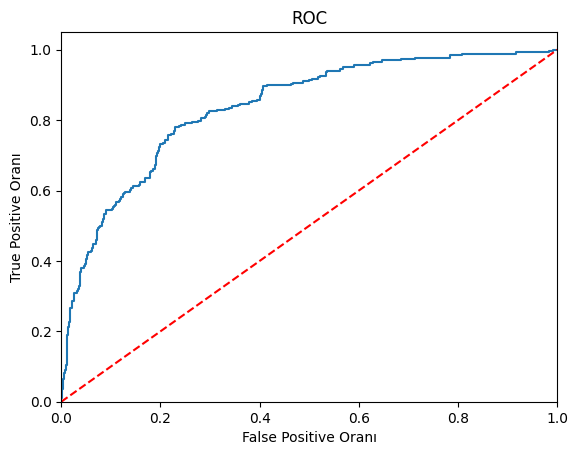

In [33]:
logit_roc_auc = roc_auc_score(Y, loj_model.predict(X))

false_positive_rate, true_positive_rate, thresholds_rate = roc_curve(Y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(false_positive_rate, true_positive_rate, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=.25,
                                                    random_state=42)

In [39]:
loj_model = LogisticRegression(solver='liblinear')
loj_model = loj_model.fit(X_train, Y_train)

## Test Hatamızı Değerlendirelim

In [43]:
# Test Hatamızı Değerlendirelim
acc_score = accuracy_score(Y_test, loj_model.predict(X_test))
print("Test seti için Doğruluk Değerimiz:",acc_score)

Test seti için Doğruluk Değerimiz: 0.7447916666666666


## Test Seti için En Doğrulanmış Skora Yani Cross-Val-Score'a Erişmek İstersek;

In [48]:
print("Test için en güvenli doğrulama skorundan alınan değer:",cross_val_score(loj_model, X_test, Y_test, cv = 10).mean())

Test için en güvenli doğrulama skorundan alınan değer: 0.7397368421052632
